In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [4]:
##Force Calibration with single freq, with xyz2

In [5]:
Year = "2020"
Month = "01"
Day = "13"
BeadNumber =1
folder = r"/data/new_trap/"+ Year + Month + Day

In [6]:
ResX=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=13+i
    SigFreq=151
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResX[i]=np.sqrt(xpsd[SigFreq*10])
    print(np.sqrt(xpsd[SigFreq*10]))
    #print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

No height data
0.0034907565966789964
No height data
0.0034988302854130873
No height data
0.003501008400808456
No height data
0.0034662204444342497
No height data
0.0034182538303328806


In [7]:
ResY=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=18+i
    SigFreq=151
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResY[i]=np.sqrt(ypsd[SigFreq*10])    
    #print(np.sqrt(xpsd[SigFreq*10]))
    print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

No height data
0.002799816757135983
No height data
0.002811647975927043
No height data
0.0028033722689201185
No height data
0.002786304492288798
No height data
0.002785566463786243


In [8]:
ResZ=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=23+i
    SigFreq=151
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResZ[i]=np.sqrt(zpsd[SigFreq*10])    
    print(np.sqrt(zpsd[SigFreq*10]))
    

No height data
8681.792588302631
No height data
8621.90176416928
No height data
8939.612194962863
No height data
8904.938888012295
No height data
8853.139450758885


In [9]:
q=11
V=10
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)*np.sqrt(5)
print(F)

5.956417077831592e-15


In [10]:
AveX=np.average(ResX)
AveY=np.average(ResY)
AveZ=np.average(ResZ)
BtoFx=F/AveX
BtoFy=F/AveY
BtoFz=F/AveZ
print(BtoFx)
print(BtoFy)
print(BtoFz)

1.7140699949609718e-12
2.1293134509182023e-12
6.768442735649983e-19


In [11]:
##code for Transfer Function

In [11]:
##X preparation
NdataX=4
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [12]:
##Y preparataion
NdataY=5
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY
BDF = BeadDataFile.BeadDataFile(fname) 
data = BDF.xyz2 
res=50000 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
Noise0Y=np.sqrt(ypsd[fbase*10]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [13]:
##Z preparation
NdataZ=6
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0Z=np.sqrt(zpsd[fbase*10])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [14]:
#Here, there is no conversion factor
q=11
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100

FnoiseXX=XnoiseX
FnoiseXY=XnoiseY
FnoiseXZ=XnoiseZ
FnoiseYX=YnoiseX
FnoiseYY=YnoiseY
FnoiseYZ=YnoiseZ
FnoiseZX=ZnoiseX
FnoiseZY=ZnoiseY
FnoiseZZ=ZnoiseZ

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [19]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFBead%d%d%d_Bit.txt" % (NdataX,NdataY,NdataZ)

f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [16]:
Ndata=20
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 5000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=299.385
gx=43.798
w0y=290.541
gy=23.5191
w0z=313.163
gz=232.409

f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

/data/new_trap/20200113/Bead1/InitialTest/Data20.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


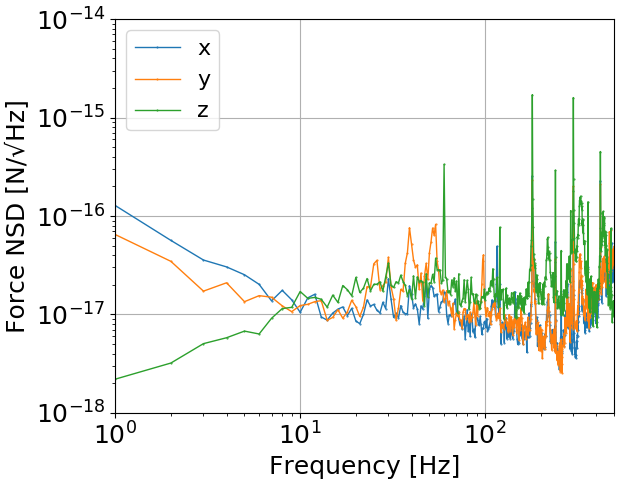

In [17]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-14)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity%d.png" % Ndata

plt.savefig(ofname,dpi=300)

In [20]:
##Interpolate transfer function for the paper

In [15]:
##X preparation
NdataX=4
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
tInt=10
Nharm=100
fsamp=5000
res=fsamp*tInt
fBase=7;

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)
XrespX=np.zeros(Nharm+1)
XrespY=np.zeros(Nharm+1)
XrespZ=np.zeros(Nharm+1)

XrespX[0]=XnoiseX[tInt*fBase]
XrespY[0]=XnoiseY[tInt*fBase]
XrespZ[0]=XnoiseZ[tInt*fBase]
 
for i in range (1,(Nharm+1)):
    XrespX[i]=XnoiseX[tInt*(i)*fBase]
    XrespY[i]=XnoiseY[tInt*(i)*fBase]
    XrespZ[i]=XnoiseZ[tInt*(i)*fBase]
    
XtfX=np.zeros(7001)
XtfY=np.zeros(7001)
XtfZ=np.zeros(7001)

for i in range (100):
    for j in range((fBase*10)):
        XtfX[i*fBase*10+j]=(XrespX[i]*(fBase*10-j)+XrespX[i+1]*j)/(fBase*10)
        XtfY[i*fBase*10+j]=(XrespY[i]*(fBase*10-j)+XrespY[i+1]*j)/(fBase*10)
        XtfZ[i*fBase*10+j]=(XrespZ[i]*(fBase*10-j)+XrespZ[i+1]*j)/(fBase*10)
XtfX[7000]=XrespX[100]
XtfY[7000]=XrespY[100]
XtfZ[7000]=XrespZ[100]

/data/new_trap/20200113/Bead1/TransFunc/TransFunc_X_4.h5
No height data
No cantilever data
Error loading spinning data


In [16]:
##Y preparataion
NdataY=5
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
YnoiseX=np.sqrt(xpsd)
YnoiseY=np.sqrt(ypsd)
YnoiseZ=np.sqrt(zpsd)
YrespX=np.zeros(Nharm+1)
YrespY=np.zeros(Nharm+1)
YrespZ=np.zeros(Nharm+1)

YrespX[0]=YnoiseX[tInt*fBase]
YrespY[0]=YnoiseY[tInt*fBase]
YrespZ[0]=YnoiseZ[tInt*fBase]

for i in range (1,(Nharm+1)):
    YrespX[i]=YnoiseX[tInt*(i)*fBase]
    YrespY[i]=YnoiseY[tInt*(i)*fBase]
    YrespZ[i]=YnoiseZ[tInt*(i)*fBase]
    
YtfX=np.zeros(7001)
YtfY=np.zeros(7001)
YtfZ=np.zeros(7001)

for i in range (100):
    for j in range((fBase*10)):
        YtfX[i*fBase*10+j]=(YrespX[i]*(fBase*10-j)+YrespX[i+1]*j)/(fBase*10)
        YtfY[i*fBase*10+j]=(YrespY[i]*(fBase*10-j)+YrespY[i+1]*j)/(fBase*10)
        YtfZ[i*fBase*10+j]=(YrespZ[i]*(fBase*10-j)+YrespZ[i+1]*j)/(fBase*10)
YtfX[7000]=YrespX[100]
YtfY[7000]=YrespY[100]
YtfZ[7000]=YrespZ[100]

/data/new_trap/20200113/Bead1/TransFunc/TransFunc_Y_5.h5
No height data
No cantilever data
Error loading spinning data


In [17]:
##Z preparation
NdataZ=6
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)
ZrespX=np.zeros(Nharm+1)
ZrespY=np.zeros(Nharm+1)
ZrespZ=np.zeros(Nharm+1)

ZrespX[0]=0
ZrespY[0]=0
ZrespZ[0]=0

for i in range (1,(Nharm+1)):
    ZrespX[i]=ZnoiseX[tInt*(i)*fBase]
    ZrespY[i]=ZnoiseY[tInt*(i)*fBase]
    ZrespZ[i]=ZnoiseZ[tInt*(i)*fBase]
    
ZtfX=np.zeros(7001)
ZtfY=np.zeros(7001)
ZtfZ=np.zeros(7001)

for i in range (100):
    for j in range((fBase*10)):
        ZtfX[i*fBase*10+j]=(ZrespX[i]*(fBase*10-j)+ZrespX[i+1]*j)/(fBase*10)
        ZtfY[i*fBase*10+j]=(ZrespY[i]*(fBase*10-j)+ZrespY[i+1]*j)/(fBase*10)
        ZtfZ[i*fBase*10+j]=(ZrespZ[i]*(fBase*10-j)+ZrespZ[i+1]*j)/(fBase*10)
ZtfX[7000]=ZrespX[100]
ZtfY[7000]=ZrespY[100]
ZtfZ[7000]=ZrespZ[100]

No height data
No cantilever data
Error loading spinning data


In [31]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFintBitInterpolate%d%d%d.txt" % (NdataX,NdataY,NdataZ)

f1 = open(ofname,"a")
for i in range(1001):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % ((0.1*(i+10)),XtfX[i],XtfY[i],XtfZ[i],YtfX[i],YtfY[i],YtfZ[i],ZtfX[i],ZtfY[i],ZtfZ[i]))

#    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
#                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

<IPython.core.display.Javascript object>


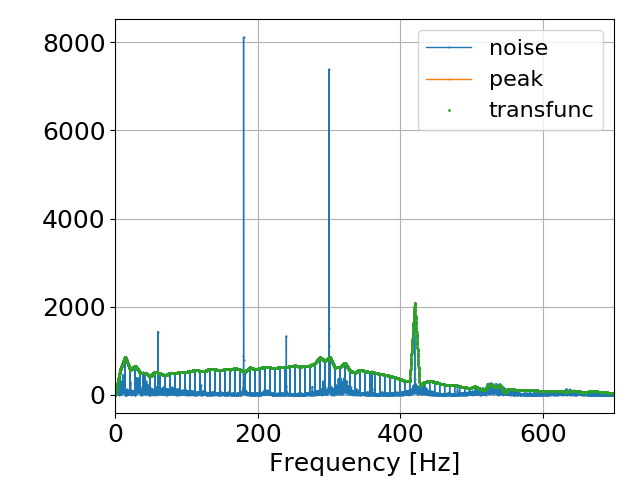

In [55]:
freqresp=np.zeros(101)
for i in range(0,101):
    freqresp[i]=i*7
freqtf=np.zeros(7001)
for i in range (0,7001):
    freqtf[i]=i/10.0
    
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.plot(freqs, ZnoiseZ, '.-', label="noise",markersize=1,linewidth=1)
ax.plot( freqresp,ZrespZ, '.-', label="peak",markersize=1,linewidth=1)
ax.plot(freqtf,ZtfZ, '.', label="transfunc",markersize=2,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(0,700)
#plt.ylim(1e-18,1e-14)
plt.grid(True)

In [41]:
Ndata=20
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xnsd=np.sqrt(xpsd)
ynsd=np.sqrt(ypsd)
znsd=np.sqrt(zpsd)
f0=71
Xsens=np.zeros(7000)
Ysens=np.zeros(7000)
Zsens=np.zeros(7000)

for i in range(1,7000):
    Xsens[i-1]=xnsd[i]*XtfX[f0*10]/XtfX[i]*BtoFx
    Ysens[i-1]=ynsd[i]*YtfY[f0*10]/YtfY[i]*BtoFy
    Zsens[i-1]=znsd[i]*ZtfZ[f0*10]/ZtfZ[i]*BtoFz

/data/new_trap/20200113/Bead1/InitialTest/Data20.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


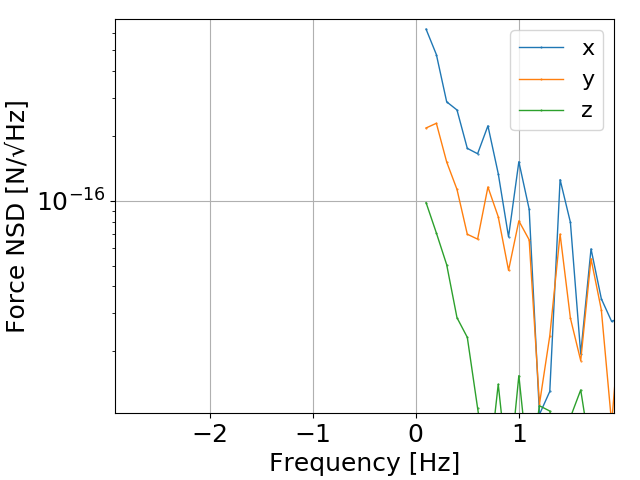

UsageError: Line magic function `%plt.savefig` not found.


In [43]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.semilogy(np.linspace(0.1,700,7000),Xsens, '.-', label="x",markersize=1,linewidth=1)
ax.semilogy(np.linspace(0.1,700,7000),Ysens, '.-', label="y",markersize=1,linewidth=1)
ax.semilogy(np.linspace(0.1,700,7000),Zsens, '.-', label="z",markersize=1,linewidth=1)
#ax.loglog(np.linspace(0.1,700,7000),Xsens, '.-', label="x",markersize=1,linewidth=1)
#ax.loglog(np.linspace(0.1,700,7000),Ysens, '.-', label="y",markersize=1,linewidth=1)
#ax.loglog(np.linspace(0.1,700,7000),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
#plt.xlim(1,500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity1-500Interpolate%d.png" % Ndata

%plt.savefig(ofname,dpi=300)

In [ ]:
#Write freq vs x, y, z sens to a txt file

In [48]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivityInterpolate%d.txt" % Ndata

f1 = open(ofname,"a")
for i in range(7000):
    f1.write('%f %e %e %e\n' % ((0.1*(i+1)),Xsens[i], Ysens[i], Zsens[i]))

f1.close()

In [18]:
#averaged force sensitivity for the paper, with statistically correct treatment

In [38]:
f0=71
res = 50000
Xsens=np.zeros(7000)
Ysens=np.zeros(7000)
Zsens=np.zeros(7000)
Nsum=0

xpsdSum=np.zeros(25001)
ypsdSum=np.zeros(25001)
zpsdSum=np.zeros(25001)


for Ndata in range(20,25):
    fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
    print(fname)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2

    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    Nsum+=1
    xpsdSum+=xpsd
    ypsdSum+=ypsd
    zpsdSum+=zpsd
    
    
    
xnsd=np.sqrt(xpsdSum)
ynsd=np.sqrt(ypsdSum)
znsd=np.sqrt(zpsdSum)
    
    
    
for i in range(1,7000):
    Xsens[i-1]+=xnsd[i]*XtfX[f0*10]/XtfX[i]*BtoFx/np.sqrt(Nsum)
    Ysens[i-1]+=ynsd[i]*YtfY[f0*10]/YtfY[i]*BtoFy/np.sqrt(Nsum)
    Zsens[i-1]+=znsd[i]*ZtfZ[f0*10]/ZtfZ[i]*BtoFz/np.sqrt(Nsum)
        


/data/new_trap/20200113/Bead1/InitialTest/Data20.h5
No height data
No electrodes data
No cantilever data
/data/new_trap/20200113/Bead1/InitialTest/Data21.h5
No height data
No electrodes data
No cantilever data
/data/new_trap/20200113/Bead1/InitialTest/Data22.h5
No height data
No electrodes data
No cantilever data
/data/new_trap/20200113/Bead1/InitialTest/Data23.h5
No height data
No electrodes data
No cantilever data
/data/new_trap/20200113/Bead1/InitialTest/Data24.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


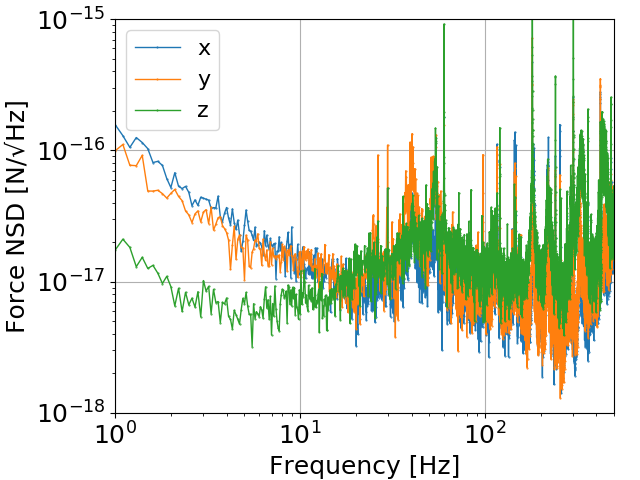

In [40]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
#ax.semilogy(np.linspace(0.1,700,7000),Xsens, '.-', label="x",markersize=1,linewidth=1)
#ax.semilogy(np.linspace(0.1,700,7000),Ysens, '.-', label="y",markersize=1,linewidth=1)
#ax.semilogy(np.linspace(0.1,700,7000),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.loglog(np.linspace(0.1,700,7000),Xsens, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(np.linspace(0.1,700,7000),Ysens, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(np.linspace(0.1,700,7000),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivityInterpolate20-24_Ave5.png" #% Ndata

plt.savefig(ofname,dpi=300)

In [ ]:
#Let's have 5000 resolution one as well

In [70]:
##X preparation
NdataX=4
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
tInt=10
Nharm=100
fsamp=5000
res=fsamp*tInt
fBase=7;

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)
XrespX=np.zeros(Nharm+1)
XrespY=np.zeros(Nharm+1)
XrespZ=np.zeros(Nharm+1)

XrespX[0]=XnoiseX[tInt*fBase]
XrespY[0]=XnoiseY[tInt*fBase]
XrespZ[0]=XnoiseZ[tInt*fBase]
 
for i in range (1,(Nharm+1)):
    XrespX[i]=XnoiseX[tInt*(i)*fBase]
    XrespY[i]=XnoiseY[tInt*(i)*fBase]
    XrespZ[i]=XnoiseZ[tInt*(i)*fBase]
    
XtfX=np.zeros(701)
XtfY=np.zeros(701)
XtfZ=np.zeros(701)

for i in range (100):
    for j in range((fBase)):
        XtfX[i*fBase+j]=(XrespX[i]*(fBase-j)+XrespX[i+1]*j)/(fBase)
        XtfY[i*fBase+j]=(XrespY[i]*(fBase-j)+XrespY[i+1]*j)/(fBase)
        XtfZ[i*fBase+j]=(XrespZ[i]*(fBase-j)+XrespZ[i+1]*j)/(fBase)
XtfX[700]=XrespX[100]
XtfY[700]=XrespY[100]
XtfZ[700]=XrespZ[100]

/data/new_trap/20200113/Bead1/TransFunc/TransFunc_X_4.h5
No height data
No cantilever data
Error loading spinning data


In [71]:
##Y preparataion
NdataY=5
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
YnoiseX=np.sqrt(xpsd)
YnoiseY=np.sqrt(ypsd)
YnoiseZ=np.sqrt(zpsd)
YrespX=np.zeros(Nharm+1)
YrespY=np.zeros(Nharm+1)
YrespZ=np.zeros(Nharm+1)

YrespX[0]=YnoiseX[tInt*fBase]
YrespY[0]=YnoiseY[tInt*fBase]
YrespZ[0]=YnoiseZ[tInt*fBase]

for i in range (1,(Nharm+1)):
    YrespX[i]=YnoiseX[tInt*(i)*fBase]
    YrespY[i]=YnoiseY[tInt*(i)*fBase]
    YrespZ[i]=YnoiseZ[tInt*(i)*fBase]
    
YtfX=np.zeros(701)
YtfY=np.zeros(701)
YtfZ=np.zeros(701)

for i in range (100):
    for j in range((fBase)):
        YtfX[i*fBase+j]=(YrespX[i]*(fBase-j)+YrespX[i+1]*j)/(fBase)
        YtfY[i*fBase+j]=(YrespY[i]*(fBase-j)+YrespY[i+1]*j)/(fBase)
        YtfZ[i*fBase+j]=(YrespZ[i]*(fBase-j)+YrespZ[i+1]*j)/(fBase)
YtfX[700]=YrespX[100]
YtfY[700]=YrespY[100]
YtfZ[700]=YrespZ[100]

/data/new_trap/20200113/Bead1/TransFunc/TransFunc_Y_5.h5
No height data
No cantilever data
Error loading spinning data


In [72]:
##Z preparation
NdataZ=6
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)
ZrespX=np.zeros(Nharm+1)
ZrespY=np.zeros(Nharm+1)
ZrespZ=np.zeros(Nharm+1)

ZrespX[0]=0
ZrespY[0]=0
ZrespZ[0]=0

for i in range (1,(Nharm+1)):
    ZrespX[i]=ZnoiseX[tInt*(i)*fBase]
    ZrespY[i]=ZnoiseY[tInt*(i)*fBase]
    ZrespZ[i]=ZnoiseZ[tInt*(i)*fBase]
    
ZtfX=np.zeros(701)
ZtfY=np.zeros(701)
ZtfZ=np.zeros(701)

for i in range (100):
    for j in range((fBase)):
        ZtfX[i*fBase+j]=(ZrespX[i]*(fBase-j)+ZrespX[i+1]*j)/(fBase)
        ZtfY[i*fBase+j]=(ZrespY[i]*(fBase-j)+ZrespY[i+1]*j)/(fBase)
        ZtfZ[i*fBase+j]=(ZrespZ[i]*(fBase-j)+ZrespZ[i+1]*j)/(fBase)
ZtfX[700]=ZrespX[100]
ZtfY[700]=ZrespY[100]
ZtfZ[700]=ZrespZ[100]

No height data
No cantilever data
Error loading spinning data


In [74]:
Ndata=20
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 5000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xnsd=np.sqrt(xpsd)
ynsd=np.sqrt(ypsd)
znsd=np.sqrt(zpsd)
f0=71
Xsens=np.zeros(700)
Ysens=np.zeros(700)
Zsens=np.zeros(700)

for i in range(1,701):
    Xsens[i-1]=xnsd[i]*XtfX[f0]/XtfX[i]*BtoFx
    Ysens[i-1]=ynsd[i]*YtfY[f0]/YtfY[i]*BtoFy
    Zsens[i-1]=znsd[i]*ZtfZ[f0]/ZtfZ[i]*BtoFz

/data/new_trap/20200113/Bead1/InitialTest/Data20.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


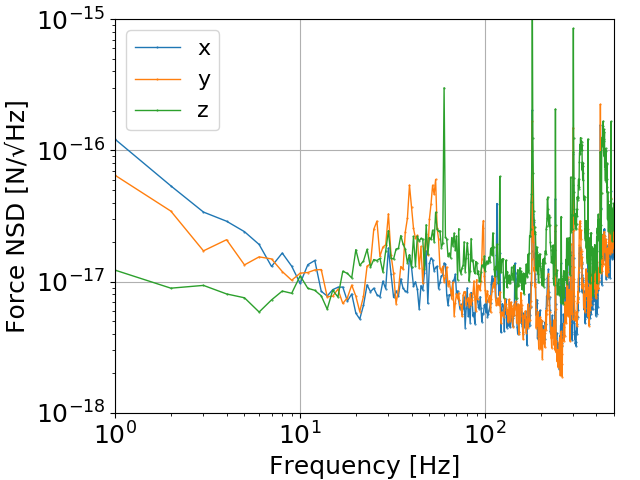

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [77]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
#ax.semilogy(np.linspace(0.1,700,7000),Xsens, '.-', label="x",markersize=1,linewidth=1)
#ax.semilogy(np.linspace(0.1,700,7000),Ysens, '.-', label="y",markersize=1,linewidth=1)
#ax.semilogy(np.linspace(0.1,700,7000),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.loglog(np.linspace(1,700,700),Xsens, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(np.linspace(1,700,700),Ysens, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(np.linspace(1,700,700),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity1-500Interpolate_1HzRes%d.eps" % Ndata

plt.savefig(ofname,dpi=300)

In [ ]:
##force sensitivity plot for the paper

In [18]:
Ndata=20
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=299.385
gx=43.798
w0y=290.541
gy=23.5191
w0z=313.163
gz=232.409

f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

/data/new_trap/20200113/Bead1/InitialTest/Data20.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


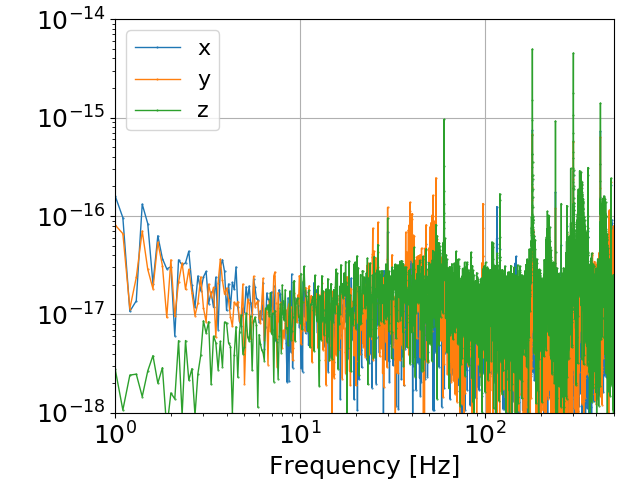

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-14)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity%d.eps" % Ndata

plt.savefig(ofname,dpi=300)

In [73]:
##1000 Data Analysis

In [35]:
#analyzing multiple data in single number
Nint=2
Nave=3
Ndata=22
Dx=375
for k in range(0,1000):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)

    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XSignal%d_%d.txt" % (Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    for i in range(1,50):
        Intx=xFFT[Fshake*10*i]
        IntNSDx=xnsd[Fshake*10*i]
        Inty=yFFT[Fshake*10*i]
        IntNSDy=ynsd[Fshake*10*i]
        Intz=zFFT[Fshake*10*i]
        IntNSDz=znsd[Fshake*10*i]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j]+xFFT[Fshake*10*i-j]
            IntNSDx+=xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j]
            Inty+=yFFT[Fshake*10*i+j]+yFFT[Fshake*10*i-j]
            IntNSDy+=ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j]
            Intz+=zFFT[Fshake*10*i+j]+zFFT[Fshake*10*i-j]
            IntNSDz+=znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j]

        AveNoiseX=0
        AveNoiseY=0
        AveNoiseZ=0
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

In [49]:
##Extracting Cantilever Position Data for y

In [16]:
Ndata=24
Dx=377
for k in range(0,1):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.cant_pos
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/CantPosY%d_%d.txt" % (Dx,Ndata,NSubData)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%f\n' % data[1][i])
    f1.close()

No height data


In [71]:
##Extracting QPD sum information

In [15]:
Ndata=24
Dx=377
for k in range(0,1):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.quad_sum
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/BeamProfile%d_%dQuadSumY.txt" % (Dx,Ndata,NSubData)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%d\n' % data[i])
    f1.close()

No height data


In [36]:
##for Noise only analysis for sensitivity. Used bin of 3*n-0.7 Hz. 
Nint=2
Nave=3
Ndata=24
Dx=377
for k in range(0,1000):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)

    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise%d_%d.txt" % (Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    
    for i in range(1,50):
        Intx=xFFT[Fshake*10*i-7]
        IntNSDx=xnsd[Fshake*10*i-7]
        Inty=yFFT[Fshake*10*i-7]
        IntNSDy=ynsd[Fshake*10*i-7]
        Intz=zFFT[Fshake*10*i-7]
        IntNSDz=znsd[Fshake*10*i-7]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j-7]+xFFT[Fshake*10*i-j-7]
            IntNSDx+=xnsd[Fshake*10*i+j-7]+xnsd[Fshake*10*i-j-7]
            Inty+=yFFT[Fshake*10*i+j-7]+yFFT[Fshake*10*i-j-7]
            IntNSDy+=ynsd[Fshake*10*i+j-7]+ynsd[Fshake*10*i-j-7]
            Intz+=zFFT[Fshake*10*i+j-7]+zFFT[Fshake*10*i-j-7]
            IntNSDz+=znsd[Fshake*10*i+j-7]+znsd[Fshake*10*i-j-7]

        AveNoiseX=0
        AveNoiseY=0
        AveNoiseZ=0
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

In [17]:
##Get the data in time domain
#analyzing multiple data in single number
Nint=2
Nave=3
Ndata=24
Dx=377
for k in range(1,1000):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]*BtoFx/np.sqrt(5)*1e18
    y_1000=data_det[1]*BtoFy/np.sqrt(5)*1e18
    z_1000=data_det[2]*BtoFz/np.sqrt(5)*1e18

    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XTimeSignal%d_%d.txt" % (Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    for i in range(1,50000):        
        f1.write('%e %e %e\n' % (x_1000[i],y_1000[i],z_1000[i]))
    f1.close()

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

In [107]:
##following is the test of frequency filtering based on FFT. 
Nint=2
Nave=3
Ndata=24
Dx=377
for k in range(0,1):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    xFFT=np.fft.rfft(x_1000)
    xSigFFT=np.fft.rfft(x_1000)
#    xSigFFT=xFFT
#    xSigFFT[0]=xFFT[0]
    for i in range(1,25000):
        if ((i%30)!=0):
            xSigFFT[i]=0
    for i in range(0,10):
        xFFT[i]=0
    for i in range(5000,25000):
        xFFT[i]=0
    x_iFFT=np.fft.irfft(xFFT)
    x_Sig=np.fft.irfft(xSigFFT)

No height data


<IPython.core.display.Javascript object>


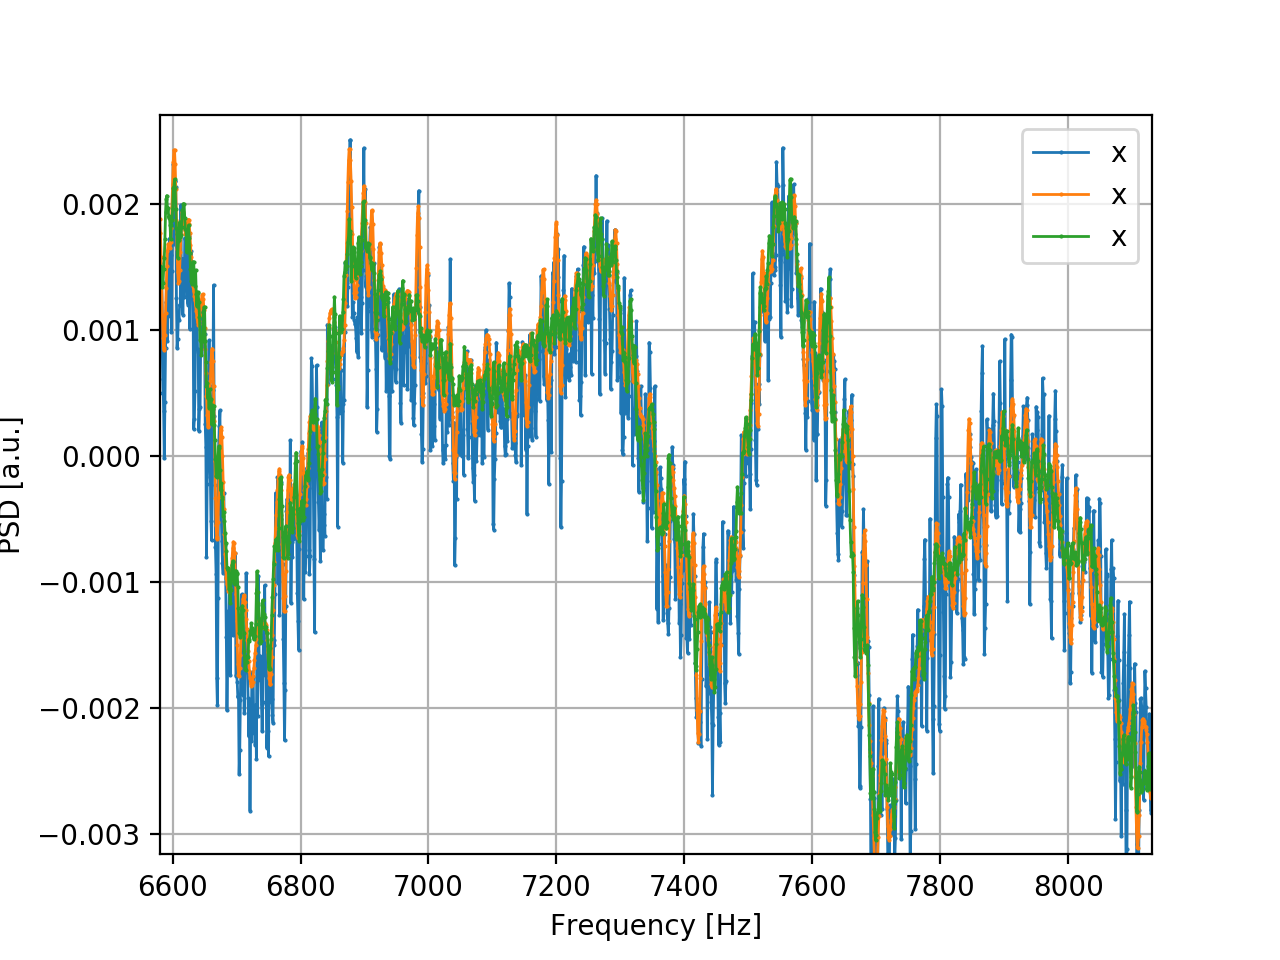

In [108]:
_,ax = plt.subplots()
ax.plot(x_1000, '.-', label="x",markersize=1,linewidth=1)
ax.plot(x_iFFT, '.-', label="x",markersize=1,linewidth=1)
ax.plot(x_Sig, '.-', label="x",markersize=1,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,1000)
#plt.ylim(1e-12,1e-5)
plt.grid(True)

In [34]:
i=1
if i>2:
    print("true")
else: 
    print("false")

false


In [35]:
9869%89

79

In [36]:
89*79


7031

In [114]:
##Get the data in time domain, only with 1-100 harmonics of 3 Hz
#analyzing multiple data in single number
Nint=2
Nave=3
Ndata=24
Dx=377
for k in range(1,1000):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]*BtoFx/np.sqrt(5)*1e18
    y_1000=data_det[1]*BtoFy/np.sqrt(5)*1e18
    z_1000=data_det[2]*BtoFz/np.sqrt(5)*1e18

    
    xSigFFT=np.fft.rfft(x_1000)
    ySigFFT=np.fft.rfft(y_1000)
    zSigFFT=np.fft.rfft(z_1000)
    for i in range(1,3001):
        if ((i%30)!=0):
            xSigFFT[i]=0
            ySigFFT[i]=0
            zSigFFT[i]=0
    for i in range(3001,25000):
        xSigFFT[i]=0
        ySigFFT[i]=0
        zSigFFT[i]=0
        
    x_Sig=np.fft.irfft(xSigFFT)
    y_Sig=np.fft.irfft(ySigFFT)
    z_Sig=np.fft.irfft(zSigFFT)
    
    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XTimeHarmSignal%d_%d.txt" % (Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    for i in range(1,50000):        
        f1.write('%e %e %e\n' % (x_1000[i],y_1000[i],z_1000[i]))
    f1.close()

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

<IPython.core.display.Javascript object>


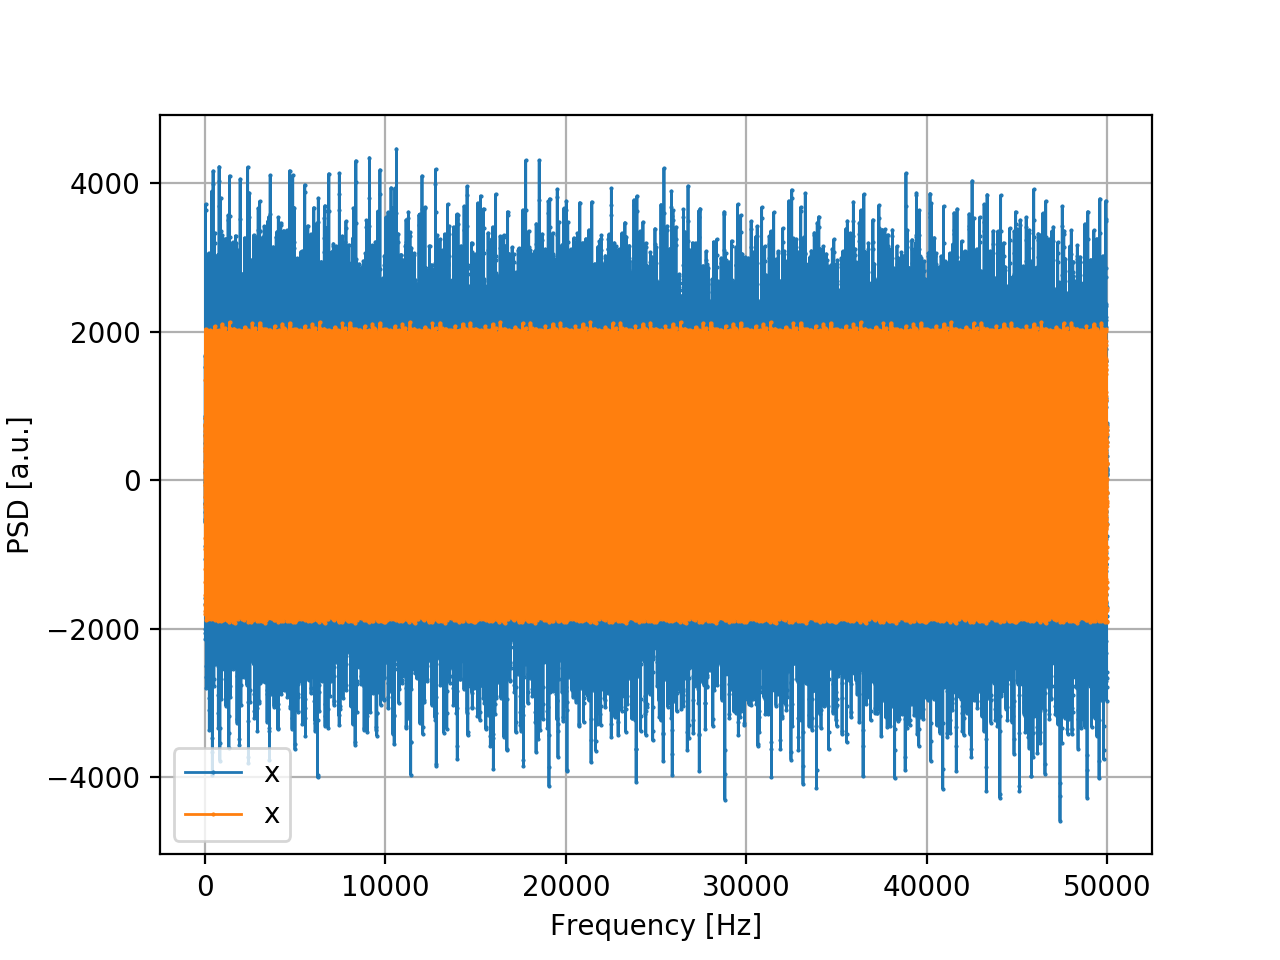

In [113]:
_,ax = plt.subplots()
ax.plot(z_1000, '.-', label="x",markersize=1,linewidth=1)
ax.plot(z_Sig, '.-', label="x",markersize=1,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,1000)
#plt.ylim(1e-12,1e-5)
plt.grid(True)